# Project Info

**Source:**

1. $C.$ $Okan$ $Sakar$<Br>
Department of Computer Engineering, Faculty of
Engineering and Natural Sciences,<Br>
Bahcesehir University,
34349 Besiktas, Istanbul, Turkey

2. $Yomi$ $Kastro$<Br>
Inveon Information Technologies Consultancy and Trade,
34335 Istanbul, Turkey<Br><Br><Br>

**Data Set Information:**

- The dataset consists of feature vectors belonging to $12,330$ sessions.

- The dataset was formed so that each session
would belong to a different user in a $1$-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.<Br><Br><Br>

**Attribute Information:**

- The dataset consists of $10$ $numerical$ and $8$ $categorical$ attributes.

- The $"Revenue"$ attribute can be used as the class label.

- $"Administrative"$, $"Administrative$ $Duration"$, $"Informational"$, $"Informational$ $Duration"$, $"Product$ $Related"$ and $"Product$ $Related$ $Duration"$ represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

- The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

- The $"Bounce$ $Rate"$, $"Exit$ $Rate"$ and $"Page$ $Value"$ features represent the metrics measured by $"Google Analytics"$ for each page in the e-commerce site.

- The value of "Bounce$ $Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave $("bounce")$ without triggering any other requests to the analytics server during that session.

- The value of $"Exit$ $Rate"$ feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

- The $"Page$ $Value"$ feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

- The $"Special$ $Day"$ feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.

- The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.

- For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.<Br><Br><Br>

**Relevant Papers:**

[Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).](https://doi.org/10.1007/s00521-018-3523-0)

# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset

In [2]:
ospi = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')
ospi.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# EDA

In [3]:
# checking the shape of the dataset
ospi.shape
# rows : 12330
# cols : 18

(12330, 18)

In [4]:
# checking the column names
ospi.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
ospi.info()

# no null values
# most columns are numerical
# 2 categorical columns : 'Month', 'VisitorType'
# 2 boolean columns     : 'Weekend', 'Revenue'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
for col in ospi.columns:
  if len(ospi[col].unique())<17:
    print(col,'\n{}'.format(ospi[col].unique()),'\nNo. of Categories : {}'.format(len(ospi[col].unique())),end='\n\n')

# 10 unique in Months
# 3 unique in VisitorType
# OperatingSystems column has 8 categories
# Browser column has 13 categories
# Region has 9 categories
# SpecialDay column has 6 categories

SpecialDay 
[0.  0.4 0.8 1.  0.2 0.6] 
No. of Categories : 6

Month 
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec'] 
No. of Categories : 10

OperatingSystems 
[1 2 4 3 7 6 8 5] 
No. of Categories : 8

Browser 
[ 1  2  3  4  5  6  7 10  8  9 12 13 11] 
No. of Categories : 13

Region 
[1 9 2 3 4 5 6 7 8] 
No. of Categories : 9

VisitorType 
['Returning_Visitor' 'New_Visitor' 'Other'] 
No. of Categories : 3

Weekend 
[False  True] 
No. of Categories : 2

Revenue 
[False  True] 
No. of Categories : 2



In [7]:
ospi.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


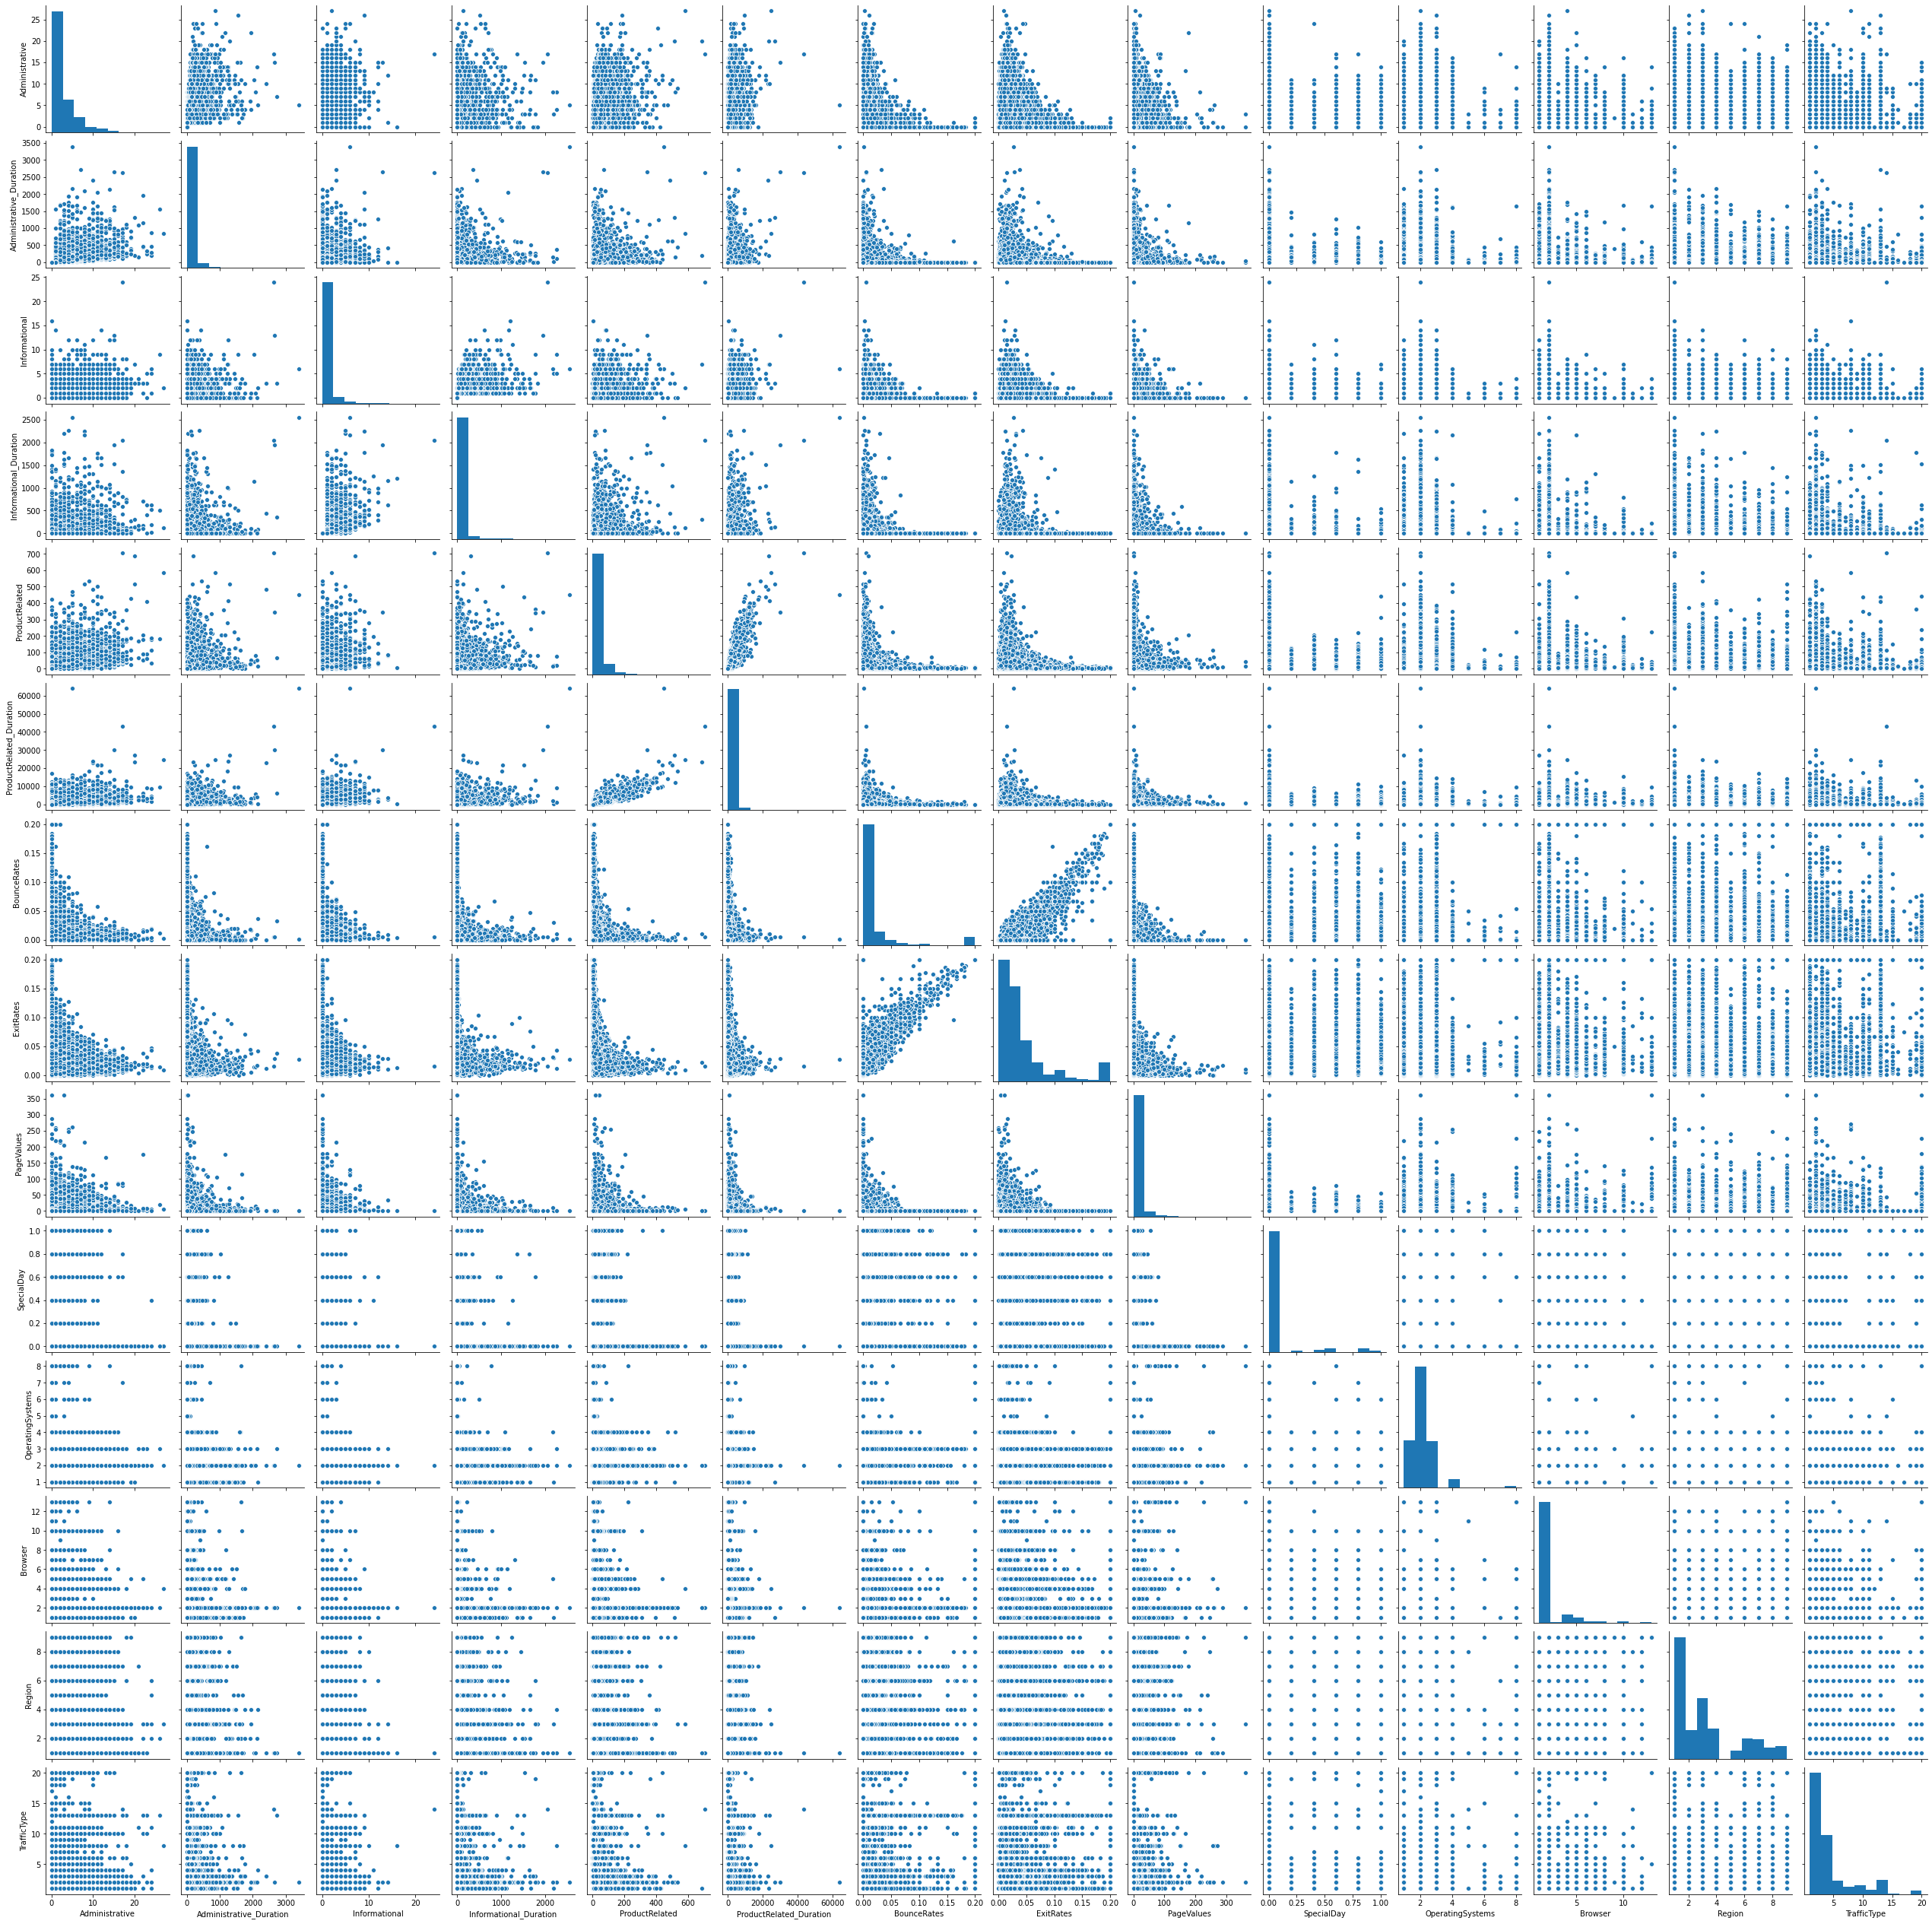

In [8]:
sns.pairplot(ospi.select_dtypes(exclude=[bool,object]))